# **Problématique et objectifs**



Le problème consiste à prédire si un client souscrira ou non à un dépôt à terme bancaire après une campagne de marketing direct.L'objectif est de construire un modèle de machine learning qui peut prédire cette probabilité avec une précision raisonnable, afin d'optimiser les futures campagnes de marketing.

Les données sont issues des campagnes de marketing direct de l'institution bancaire portugaise. Chaque entrée représente un client et les détails de ses contacts lors de la campagne. Les features sont les différentes variables disponibles dans les données qui peuvent être utilisées pour prédire la souscription à un dépôt à terme.
La variable cible est la souscription à un dépôt à terme (oui/non).

Nous allons traiter ce probleme comme une classification, car la tâche est de prédire une variable binaire : la souscription ou non à un dépôt à terme.
Les problèmes où la variable cible est une catégorie discrète sont généralement traités comme des problèmes de classification. Nous chercherons à attribuer chaque client à une classe spécifique, ce qui est la caractéristique d'un problème de classification.









Les données que nous utiliserons sont organisées de la maniere suivante :


> Nombre d'instances : 45211

> Nombre d'attributs : 16 + attribut de sortie.



Attributs : âge (numérique), emploi(catégorique), matrimonial (catégorique), éducation (catégorique), défaut (binaire), solde (numérique), logement (binaire), prêt (binaire), contact (catégorique), jour (numérique), mois  (catégorique), durée (numérique), campagne (numérique), pdays (numérique), précédent (numérique), poutcome (catégorique).

Variable de sortie (cible souhaitée) :
y - le client a-t-il souscrit à un dépôt à terme ? (binaire : "oui", "non")

# **Pré-traitement des données**


Saving bank.csv to bank (1).csv
   age          job  marital  education default  balance housing loan   contact  day month  duration  campaign  pdays  previous poutcome   y
0   30   unemployed  married    primary      no     1787      no   no  cellular   19   oct        79         1     -1         0  unknown  no
1   33     services  married  secondary      no     4789     yes  yes  cellular   11   may       220         1    339         4  failure  no
2   35   management   single   tertiary      no     1350     yes   no  cellular   16   apr       185         1    330         1  failure  no
3   30   management  married   tertiary      no     1476     yes  yes   unknown    3   jun       199         4     -1         0  unknown  no
4   59  blue-collar  married  secondary      no        0     yes   no   unknown    5   may       226         1     -1         0  unknown  no


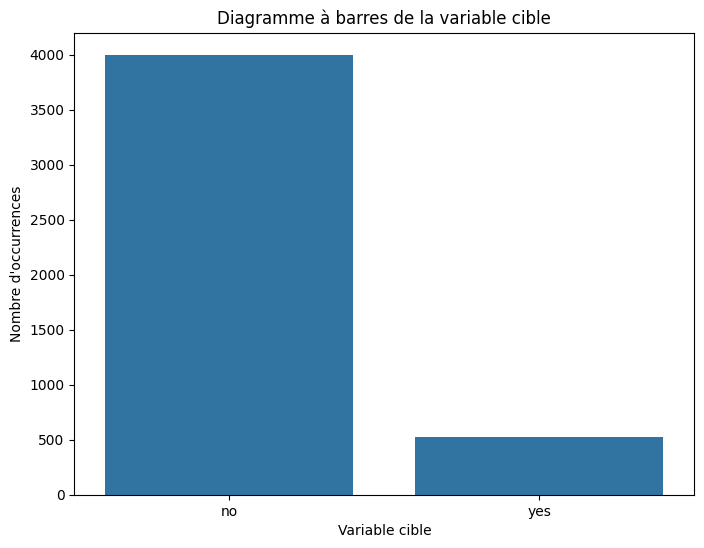

In [63]:
!pip install scikit-plot
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# Charger le fichier CSV
uploaded = files.upload()

# Récupérer le nom du fichier
nom_fichier = list(uploaded.keys())[0]

# Charger les données dans un DataFrame
Data = pd.read_csv(nom_fichier, delimiter=';')

# Ajuster manuellement la largeur d'affichage des colonnes
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

# Afficher les premières lignes du DataFrame
print(Data.head())

# Tracer le diagramme à barres de la variable cible
plt.figure(figsize=(8, 6))  # Définir la taille de la figure
sns.countplot(x='y', data=Data)  # Tracer le countplot
plt.title('Diagramme à barres de la variable cible')  # Ajouter un titre
plt.xlabel('Variable cible')  # Ajouter une étiquette pour l'axe des x
plt.ylabel('Nombre d\'occurrences')  # Ajouter une étiquette pour l'axe des y
plt.show()  # Afficher le diagramme à barres


Commentaire : on constate qu'il y a un déséquilibre de classe, le nombre de personnes n'ayant pas souscrit à un dépôt est tres élevé et 8 fois superieur au nombre de personnes ayant souscrit à un dépôt. On pourrait donc avoir des erreurs dans notre modele, car l'algorithme aura tendance à mieux predire les personnes n'ayant pas scouscrit à un dépôt.






In [64]:


# Analyse des colonnes vides
(Data.isna().sum()/Data.shape[0]).sort_values(ascending=True)



age          0.0
previous     0.0
pdays        0.0
campaign     0.0
duration     0.0
month        0.0
day          0.0
poutcome     0.0
contact      0.0
housing      0.0
balance      0.0
default      0.0
education    0.0
marital      0.0
job          0.0
loan         0.0
y            0.0
dtype: float64

Commentaire : aucune colonne n'est vide ici.

In [65]:
# Type des colonnes
print(Data.dtypes.value_counts())

print("------------------------------------")
Data.dtypes

object    10
int64      7
dtype: int64
------------------------------------


age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

age          0.0
previous     0.0
pdays        0.0
campaign     0.0
duration     0.0
month        0.0
day          0.0
poutcome     0.0
contact      0.0
housing      0.0
balance      0.0
default      0.0
education    0.0
marital      0.0
job          0.0
loan         0.0
y            0.0
dtype: float64

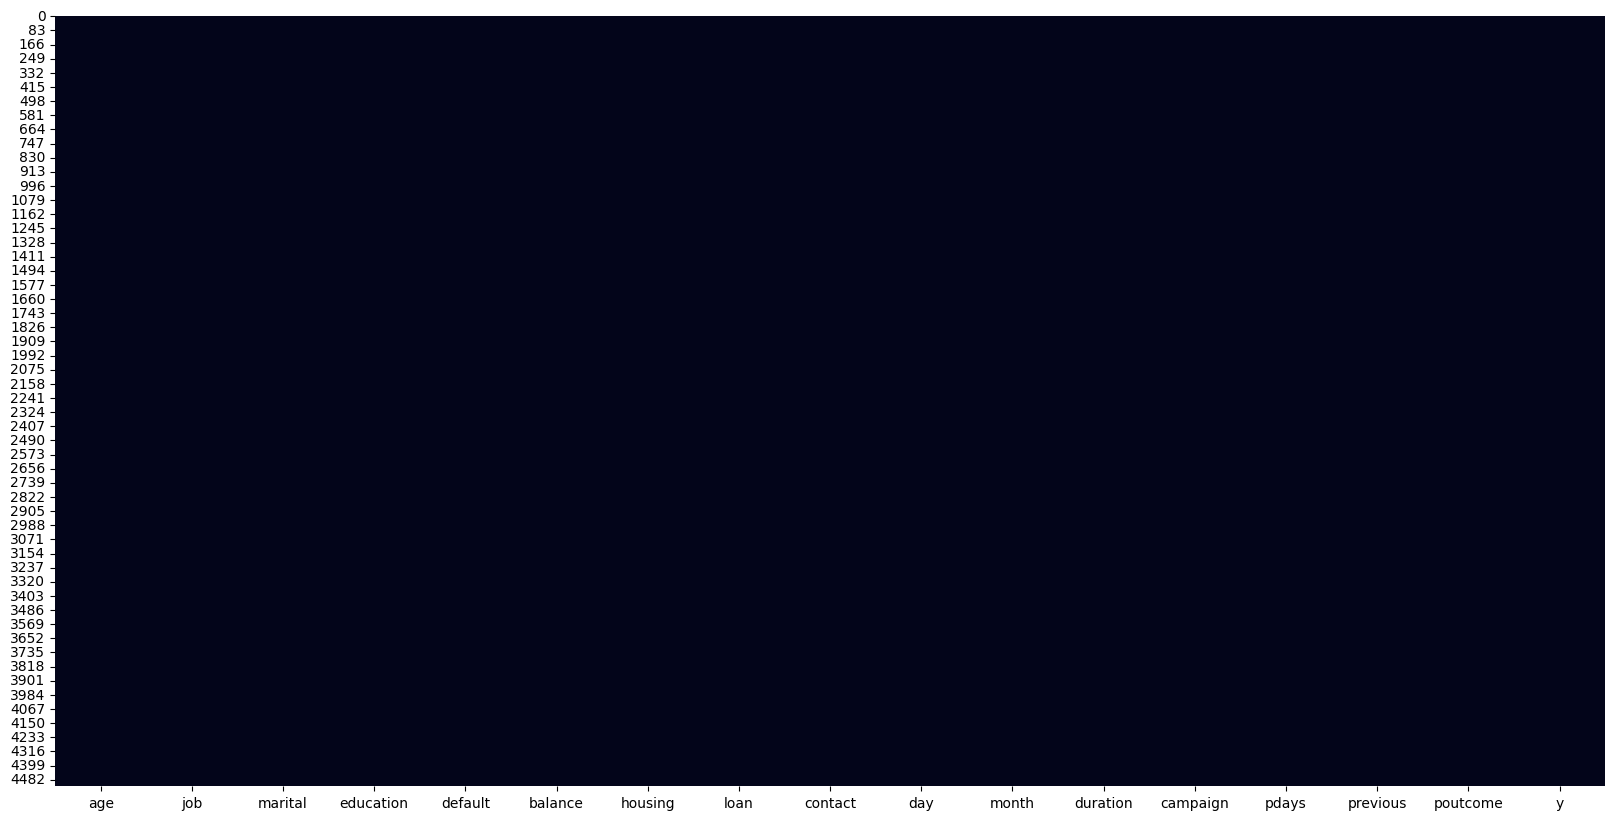

In [66]:


#Identification des valeurs manquantes
plt.figure(figsize=(20,10))
sns.heatmap(Data.isna(), cbar=False)



# Identification des colonnes vides
(Data.isna().sum()/Data.shape[0]).sort_values(ascending=True)



Commentaire : aucune colonne n'a de valeur manquante.

In [68]:
#Encodage

import pandas as pd


Data['default'].replace({'no':0, 'yes':1}, inplace = True)
Data['loan'].replace({'no':0, 'yes':1}, inplace = True)
Data['housing'].replace({'no':0, 'yes':1}, inplace = True)

# utilisez pd.get_dummies() pour encoder toutes les variables catégorielles
education_encoded = pd.get_dummies(Data['education'], prefix='education')
marital_encoded = pd.get_dummies(Data['marital'], prefix='marital')
job_encoded = pd.get_dummies(Data['job'], prefix='job')
contact_encoded = pd.get_dummies(Data['contact'], prefix='contact')
month_encoded = pd.get_dummies(Data['month'], prefix='month')
poutcome_encoded = pd.get_dummies(Data['poutcome'], prefix='poutcome')

# Concaténez toutes les colonnes d'encodage one-hot ensemble
df_encoded = pd.concat([Data, education_encoded, marital_encoded, job_encoded, contact_encoded, month_encoded, poutcome_encoded], axis=1)


# Affichez les premières lignes du DataFrame pour vérification
print(df_encoded.head())

# Affichez les premières lignes du DataFrame pour vérification
print(df_encoded.head())




   age          job  marital  education  default  balance  housing  loan   contact  day month  duration  campaign  pdays  previous poutcome   y  education_primary  education_secondary  education_tertiary  education_unknown  marital_divorced  marital_married  marital_single  job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  job_management  job_retired  job_self-employed  job_services  job_student  job_technician  job_unemployed  job_unknown  contact_cellular  contact_telephone  contact_unknown  month_apr  month_aug  month_dec  month_feb  month_jan  month_jul  month_jun  month_mar  month_may  month_nov  month_oct  month_sep  poutcome_failure  poutcome_other  poutcome_success  poutcome_unknown
0   30   unemployed  married    primary        0     1787        0     0  cellular   19   oct        79         1     -1         0  unknown  no                  1                    0                   0                  0                 0                1               0           0   

In [69]:
del df_encoded['education']
del df_encoded['marital']
del df_encoded['job']
del df_encoded['contact']
del df_encoded['month']
del df_encoded['poutcome']

In [70]:
df_encoded.head(3)

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,education_primary,education_secondary,education_tertiary,education_unknown,marital_divorced,marital_married,marital_single,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,0,1787,0,0,19,79,1,-1,0,no,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,33,0,4789,1,1,11,220,1,339,4,no,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,35,0,1350,1,0,16,185,1,330,1,no,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [71]:
# Division des données 60% train, 20% validation, 20% test

from sklearn.model_selection import train_test_split
seed = 111
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4,
                                                    random_state = seed, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5,
                                                    random_state = seed, stratify=y_test)

In [72]:
y.value_counts(normalize=True)

no     0.88476
yes    0.11524
Name: y, dtype: float64

In [73]:


y_train.value_counts(normalize=True)



no     0.884587
yes    0.115413
Name: y, dtype: float64

In [74]:
y_val.value_counts(normalize=True)

no     0.884956
yes    0.115044
Name: y, dtype: float64

In [75]:
y_test.value_counts(normalize=True)


no     0.885083
yes    0.114917
Name: y, dtype: float64

Commentaire : la proportion de chaque valeur (yes / no) est bien préservée. Il est important d'assurer cela car si on construit le modele avec une distribution dans la variable cible et que cette distribution n'est pas la même dans les données d'évaluation, on peut avoir des erreurs d'interpretation.

In [76]:
# Méthode de sur-échantillonnage (upsampling)

from sklearn.utils import resample

X2 = X_train
X2['y'] = y_train.values
X2.head(3)



,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,education_primary,education_secondary,education_tertiary,education_unknown,marital_divorced,marital_married,marital_single,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
1410,49,0,265,1,0,12,274,6,-1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,no
2887,35,0,470,1,0,25,743,13,-1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,yes
1466,33,0,69,0,1,4,77,2,-1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,no


In [77]:
minority = X2[X2.y == 'yes']
majority = X2[X2.y == 'no']

minority_upsampled = resample(minority, replace=True, n_samples = len(majority))

minority_upsampled



,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,education_primary,education_secondary,education_tertiary,education_unknown,marital_divorced,marital_married,marital_single,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
4388,83,0,1097,0,0,5,181,1,-1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,yes
2220,33,0,139,1,1,18,732,2,291,5,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,yes
4423,45,0,2048,1,0,18,310,1,804,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,yes
3730,43,0,3285,1,0,13,1721,2,-1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,yes
1179,37,0,5106,0,0,30,244,1,-1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2871,32,0,2431,1,0,14,646,5,-1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,yes
871,31,0,26965,0,0,21,654,2,-1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,yes
382,59,0,9676,0,0,27,234,2,-1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,yes
3930,51,0,1679,0,0,12,417,1,365,9,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,yes


In [78]:

majority.shape

(2399, 49)

In [44]:
upsampled = pd.concat([majority, minority_upsampled])
upsampled

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,education_primary,education_secondary,education_tertiary,education_unknown,marital_divorced,marital_married,marital_single,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
1410,49,0,265,1,0,12,274,6,-1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,no
1466,33,0,69,0,1,4,77,2,-1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,no
3195,33,0,6904,0,0,20,114,2,-1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,no
3669,42,0,30,1,0,4,98,1,266,3,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,no
4276,35,0,147,1,1,29,41,1,184,7,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4392,50,0,3357,0,0,9,239,4,-1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,yes
662,38,0,25,1,0,1,232,2,-1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,yes
1343,47,0,1233,1,0,11,91,1,100,2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,yes
3040,34,0,2374,1,0,9,161,1,209,2,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,yes


In [79]:
upsampled['y'].value_counts(normalize = True)

no     0.5
yes    0.5
Name: y, dtype: float64

Commentaire : Le probleme de desequilibre de classe est réglé ( 50% yes, 50% no).
Nos algorithmes ne seront pas influencés par le fait qu'une catégorie soit majoritaire.

In [80]:
X_train_up = upsampled.drop('y', axis=1)
y_train_up = upsampled['y']

# **Modelisation**



In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(random_state = seed)

rf.fit(X_train_up, y_train_up)

accuracy_score(y_val, rf.predict(X_val))

0.8838495575221239

In [82]:
print(X_train_up.columns)
print(rf.feature_importances_)

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'education_primary',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'marital_divorced', 'marital_married', 'marital_single', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'contact_cellular', 'contact_telephone', 'contact_unknown', 'month_apr',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')
[0.07035444 0.00127465 0.0772662  0.01910861 0.01353338 0.06601752
 0.31722948 0.0356449  0.03492068 0.02410807 0.00692292 0.01043418
 0.01052913 0.0

In [83]:
# Classement des variables en fonction de leur importance

vars_imp = pd.Series(rf.feature_importances_, index = X_train_up.columns).sort_values(ascending=False)
vars_imp

duration               0.317229
balance                0.077266
age                    0.070354
day                    0.066018
campaign               0.035645
pdays                  0.034921
poutcome_success       0.031014
contact_unknown        0.025735
previous               0.024108
housing                0.019109
month_may              0.014807
month_apr              0.014453
job_blue-collar        0.014245
contact_cellular       0.013588
loan                   0.013533
poutcome_unknown       0.013065
marital_married        0.012942
month_jun              0.011401
month_oct              0.011298
marital_single         0.011084
month_jul              0.010949
month_mar              0.010800
education_tertiary     0.010529
education_secondary    0.010434
month_aug              0.009493
job_management         0.009423
job_technician         0.009420
job_admin.             0.009088
month_nov              0.009012
education_primary      0.006923
marital_divorced       0.006726
poutcome

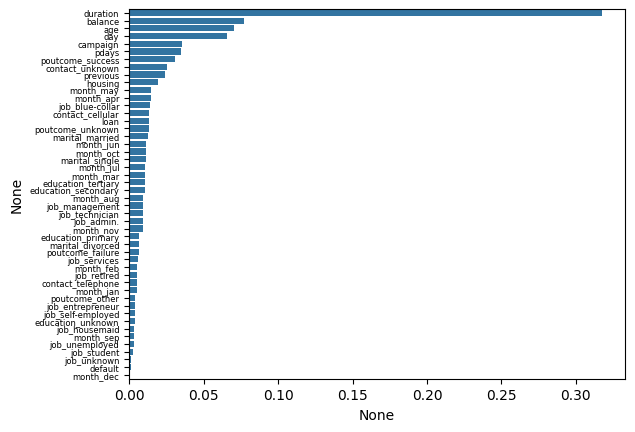

In [84]:
# Création du graphique
sns.barplot(x=vars_imp, y=vars_imp.index)

# Réduction de la taille de la police des étiquettes sur l'axe des ordonnées
plt.yticks(fontsize=6)

# Affichage du  graphique
plt.show()


In [85]:
# Selection des Features


vars_non_imp = ['education_primary','marital_divorced','poutcome_failure','job_services','month_feb','job_retired','contact_telephone','month_jan','poutcome_other','job_entrepreneur','job_self-employed','education_unknown','job_housemaid','month_sep','job_unemployed','job_student','job_unknown','default','month_dec']

X_train_up = X_train_up.drop(vars_non_imp, axis=1)
X_val = X_val.drop(vars_non_imp, axis=1)
X_test = X_test.drop(vars_non_imp, axis=1)



#  Evaluation des modeles

In [121]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Définition des hyperparamètres à rechercher
knn_hyp = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}

# Initialisation du classificateur KNN
knn = KNeighborsClassifier()

# Recherche des meilleurs hyperparamètres par validation croisée
knn_cv = GridSearchCV(knn, knn_hyp, cv=5)
knn_cv.fit(X_train_up, y_train_up)

# Affichage des meilleurs scores et du meilleur estimateur
print(knn_cv.best_score_)
print(knn_cv.best_estimator_)






0.922674661105318
KNeighborsClassifier(n_neighbors=3, weights='distance')


In [122]:
# Forêt Aléatoire

RF = RandomForestClassifier(random_state=seed)

RF_hyp = {'n_estimators':[5, 10, 20, 50, 100, 200],
          'max_depth':[None, 2, 5, 10, 15, 20]}

RF_cv = GridSearchCV(RF, RF_hyp, cv = 5)

RF_cv.fit(X_train_up, y_train_up)



print(RF_cv.best_score_)

print(RF_cv.best_estimator_)



0.9776987747653807
RandomForestClassifier(n_estimators=10, random_state=111)


In [123]:
#NaiveBayes

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Création du modèle Naive Bayes
nb = GaussianNB()

# Définition de la grille des hyperparamètres à rechercher
nb_hyp = {}  # Naive Bayes n'a pas d'hyperparamètres spécifiques à optimiser

# Recherche sur la grille avec validation croisée
nb_cv = GridSearchCV(nb, nb_hyp, cv=5)
nb_cv.fit(X_train_up, y_train_up)

# Affichage des résultats
print(nb_cv.best_score_)
print(nb_cv.best_estimator_)


0.7313438477580814
GaussianNB()


Commentaire : On remarque que l'évaluation par validation croisée sur les données d'entrainement nous montre que le modele obtenant le meilleur score est celui de la Forêt Aléatoire (environ 0.98).

# **Evaluation des performences**

# Matrice de confusion

Confusion Matrix:
[[648 153]
 [ 38  66]]
Classification Report:
              precision    recall  f1-score   support

          no       0.94      0.81      0.87       801
         yes       0.30      0.63      0.41       104

    accuracy                           0.79       905
   macro avg       0.62      0.72      0.64       905
weighted avg       0.87      0.79      0.82       905



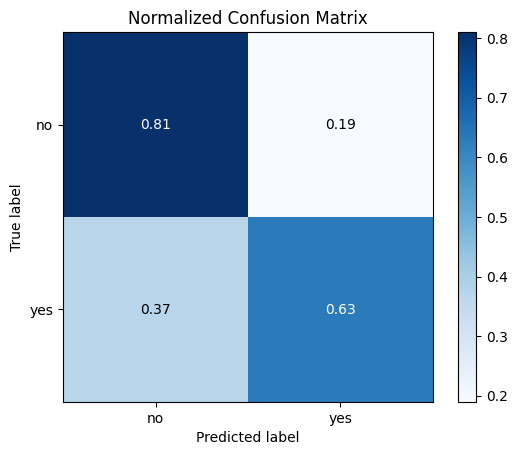

In [109]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import scikitplot as skplt



#KNN

# Création d'un objet KNeighborsClassifier
knn_classifier = KNeighborsClassifier()

# Entraînement du classificateur sur les données d'entraînement
knn_classifier.fit(X_train_up, y_train_up)

# Prédiction sur l'ensemble de test
prediction = knn_classifier.predict(X_test)

# Création de la matrice de confusion
conf_matrix = confusion_matrix(y_test, prediction)
print("Confusion Matrix:")
print(conf_matrix)

# Création du rapport de classification
class_report = classification_report(y_test, prediction)
print("Classification Report:")
print(class_report)

# Affichage de la matrice de confusion normalisée
skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)
plt.show()


** **Matrice de confusion** :**

Vrais Négatifs (VN) : Dans la cellule en haut à gauche, il y a 648 vrais négatifs. Cela signifie que le modèle a correctement prédit 648 cas où la vraie classe était "no" (négatif).

Faux Positifs (FP) : Dans la cellule en haut à droite, il y a 153 faux positifs. Cela signifie que le modèle a prédit à tort 153 cas comme "yes" (positif) alors que la vraie classe était "no".

Faux Négatifs (FN) : Dans la cellule en bas à gauche, il y a 38 faux négatifs. Cela signifie que le modèle a prédit à tort 38 cas comme "no" alors que la vraie classe était "yes".

Vrais Positifs (VP) : Dans la cellule en bas à droite, il y a 66 vrais positifs. Cela signifie que le modèle a correctement prédit 66 cas où la vraie classe était "yes".


** **Rapport de classification **:**

Précision (Precision) : C'est le nombre de vrais positifs divisé par le nombre total de prédictions positives (VP / (VP + FP)). Dans ce cas, la précision est de 30% pour la classe "yes", ce qui signifie que seulement 30% des prédictions positives sont réellement positives.

Rappel (Recall) : C'est le nombre de vrais positifs divisé par le nombre total d'échantillons réels positifs (VP / (VP + FN)). Ici, le rappel pour la classe "yes" est de 63%, ce qui signifie que le modèle identifie correctement 63% des cas réels positifs.

F1-Score : C'est la moyenne harmonique de la précision et du rappel. Il indique un équilibre entre la précision et le rappel. Plus le F1-score est élevé (entre 0 et 1), meilleur est le modèle.

Confusion Matrix:
[[771  30]
 [ 63  41]]
Classification Report:
              precision    recall  f1-score   support

          no       0.92      0.96      0.94       801
         yes       0.58      0.39      0.47       104

    accuracy                           0.90       905
   macro avg       0.75      0.68      0.71       905
weighted avg       0.88      0.90      0.89       905



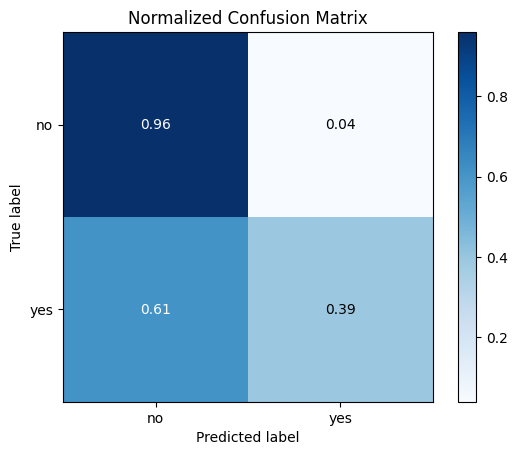

In [92]:
#Forêt aléatoire

# Création d'un objet RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=seed)

# Entraînement du classificateur sur les données d'entraînement
rf_classifier.fit(X_train_up, y_train_up)

# Prédiction sur l'ensemble de test
prediction = rf_classifier.predict(X_test)

# Création de la matrice de confusion
conf_matrix = confusion_matrix(y_test, prediction)
print("Confusion Matrix:")
print(conf_matrix)

# Création du rapport de classification
class_report = classification_report(y_test, prediction)
print("Classification Report:")
print(class_report)

# Affichage de la matrice de confusion normalisée
skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)
plt.show()

**Matrice de confusion**

Vrais Négatifs (VN) : 771 cas ont été correctement prédits comme "no".

Faux Positifs (FP) : 30 cas ont été incorrectement prédits comme "yes" alors qu'ils étaient "no".
    
Faux Négatifs (FN) : 63 cas ont été incorrectement prédits comme "no" alors qu'ils étaient "yes".

Vrais Positifs (VP) : 41 cas ont été correctement prédits comme "yes".

**Rapport de Classification :**

Précision (Precision) :

Pour la classe "no", la précision est de 92%, ce qui signifie que 92% des prédictions positives sont correctes.
Pour la classe "yes", la précision est de 58%, ce qui signifie que 58% des prédictions positives sont correctes.

Rappel (Recall) :

Pour la classe "no", le rappel est de 96%, ce qui signifie que 96% des cas réels positifs ont été correctement identifiés.
Pour la classe "yes", le rappel est de 39%, ce qui signifie que seulement 39% des cas réels positifs ont été correctement identifiés.

F1-Score :

Le F1-score est une mesure de la précision du modèle, calculée comme la moyenne harmonique de la précision et du rappel. Plus le F1-score est élevé, meilleur est le modèle.
Pour la classe "no", le F1-score est de 0.94.
Pour la classe "yes", le F1-score est de 0.47.

Précision Globale :

L'accuracy (précision globale) est de 90%, ce qui signifie que 90% des prédictions sont correctes.

Confusion Matrix:
[[705  96]
 [ 51  53]]
Classification Report:
              precision    recall  f1-score   support

          no       0.93      0.88      0.91       801
         yes       0.36      0.51      0.42       104

    accuracy                           0.84       905
   macro avg       0.64      0.69      0.66       905
weighted avg       0.87      0.84      0.85       905



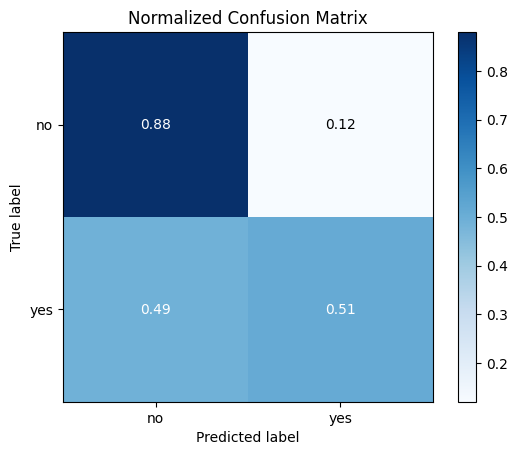

In [108]:
#Naive Bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import scikitplot as skplt

# Création d'un objet GaussianNB
nb_classifier = GaussianNB()

# Entraînement du classificateur sur les données d'entraînement
nb_classifier.fit(X_train_up, y_train_up)

# Prédiction sur l'ensemble de test
prediction = nb_classifier.predict(X_test)

# Création de la matrice de confusion
conf_matrix = confusion_matrix(y_test, prediction)
print("Confusion Matrix:")
print(conf_matrix)

# Création du rapport de classification
class_report = classification_report(y_test, prediction)
print("Classification Report:")
print(class_report)

# Affichage de la matrice de confusion normalisée
skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)
plt.show()


**Matrice de Confusion :**

Vrais Négatifs (VN) : 705 cas ont été correctement prédits comme "no".

Faux Positifs (FP) : 96 cas ont été incorrectement prédits comme "yes" alors qu'ils étaient "no".

Faux Négatifs (FN) : 51 cas ont été incorrectement prédits comme "no" alors qu'ils étaient "yes".

Vrais Positifs (VP) : 53 cas ont été correctement prédits comme "yes".

**Rapport de Classification :**

Précision (Precision) :

Pour la classe "no", la précision est de 93%, ce qui signifie que 93% des prédictions positives sont correctes.
Pour la classe "yes", la précision est de 36%, ce qui signifie que seulement 36% des prédictions positives sont correctes.

Rappel (Recall) :

Pour la classe "no", le rappel est de 88%, ce qui signifie que 88% des cas réels positifs ont été correctement identifiés.
Pour la classe "yes", le rappel est de 51%, ce qui signifie que seulement 51% des cas réels positifs ont été correctement identifiés.

F1-Score :

Le F1-score est une mesure de la précision du modèle, calculée comme la moyenne harmonique de la précision et du rappel. Plus le F1-score est élevé, meilleur est le modèle.
Pour la classe "no", le F1-score est de 0.91.
Pour la classe "yes", le F1-score est de 0.42.

Précision Globale :

L'accuracy (précision globale) est de 84%, ce qui signifie que 84% des prédictions sont correctes.

En résumé, le modèle Naive Bayes a une précision globale décente, avec une bonne précision pour la classe "no", mais une précision et un rappel plus faibles pour la classe "yes". Cela suggère que le modèle peut être plus efficace dans la prédiction des cas "no" que des cas "yes".


**Analyse globale**

Il est important de considérer à la fois la précision globale, la précision et le rappel lors de l'évaluation des performances d'un modèle, car ils offrent des perspectives différentes sur la qualité des prédictions.

KNN : Précision globale de 79%, précision et rappel relativement faibles pour la classe "yes".

Forêt Aléatoire : Précision globale de 90%, avec une meilleure précision et rappel pour la classe "yes" par rapport à KNN.

Naive Bayes : Précision globale de 84%, précision légèrement meilleure pour la classe "yes" par rapport à KNN, mais un rappel inférieur.

En considérant ces facteurs, la forêt aléatoire semble être le meilleur modèle, car elle a la plus haute précision globale et des performances relativement bonnes en termes de précision et de rappel pour les deux classes. Cependant, il est important de considérer d'autres aspects, le choix dépendra des besoins spécifiques du problème et des compromis entre la précision et le rappel que nous sommes prêts à faire





# Courbe ROC

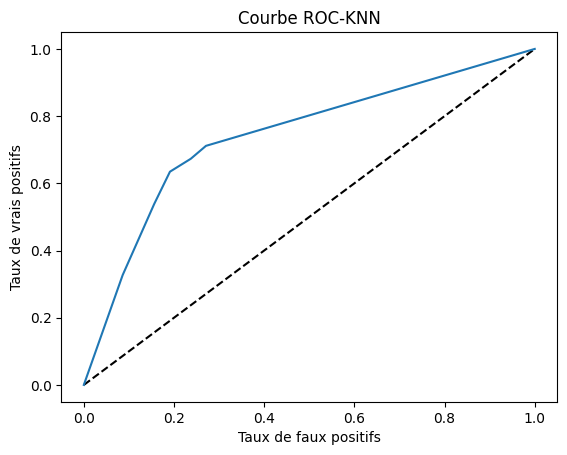

In [110]:
#KNN

# Probabilités pour chaque prédiction de la classe positive
target_prob = knn_classifier.predict_proba(X_test)[:, 1]

# Tracer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, target_prob, pos_label='yes')

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC-KNN')
plt.show()


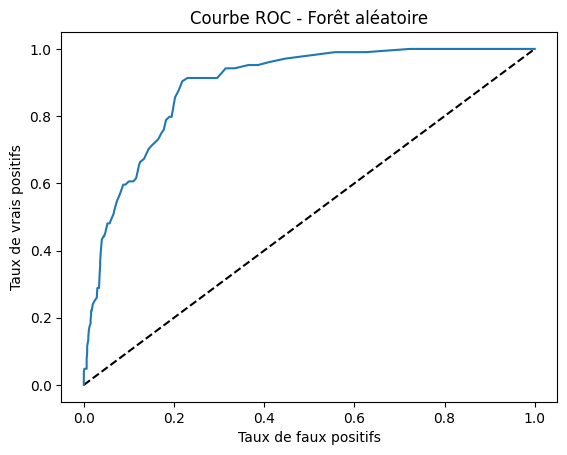

In [111]:
#Forêt aléatoire

# Probabilités pour chaque prédiction de la classe positive
target_prob_rf = rf_classifier.predict_proba(X_test)[:, 1]

# Tracer la courbe ROC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, target_prob_rf, pos_label='yes')

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf)
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC - Forêt aléatoire')
plt.show()


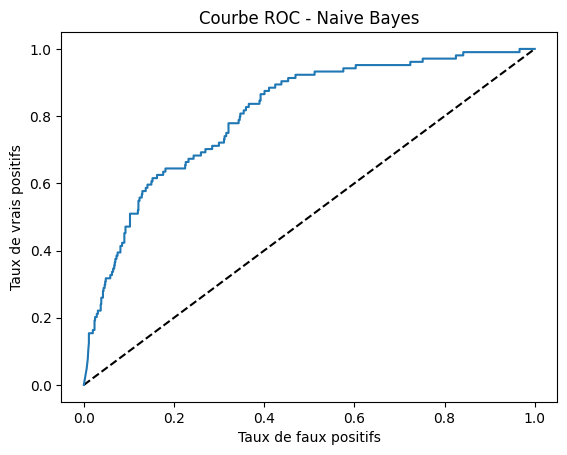

In [112]:
#Naive Bayes
# Probabilités pour chaque prédiction de la classe positive
target_prob_nb = nb_classifier.predict_proba(X_test)[:, 1]

# Tracer la courbe ROC
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, target_prob_nb, pos_label='yes')

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_nb, tpr_nb)
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC - Naive Bayes')
plt.show()


# Analyse


On remarque que l'air sous la courbe (AUC) est le plus élevé via le modele Forêt Aléatoire. Plus une courbe a des valeurs élevées, plus l’aire sous la courbe est grande, moins le classifieur fait d’erreur. Donc on en déduit que le modele faisant le moins d'erreur est le modele Forêt Aléatoire.

# Gains cumulatifs

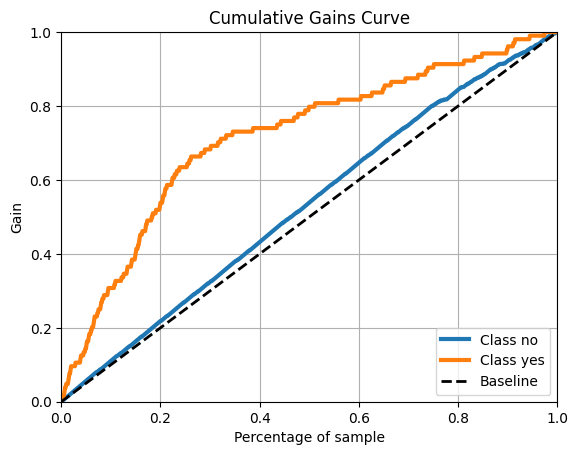

In [113]:
# K-NN

target_prob = knn_classifier.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test, target_prob)
plt.show()



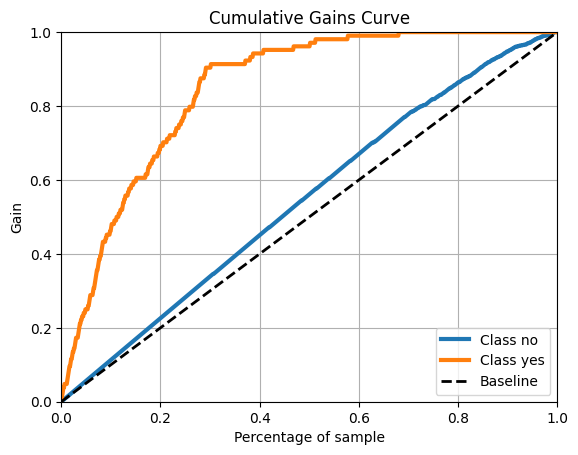

In [114]:
#Forêt aléatoire

# Probabilités pour chaque prédiction
target_prob_rf = rf_classifier.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test, target_prob_rf)
plt.show()


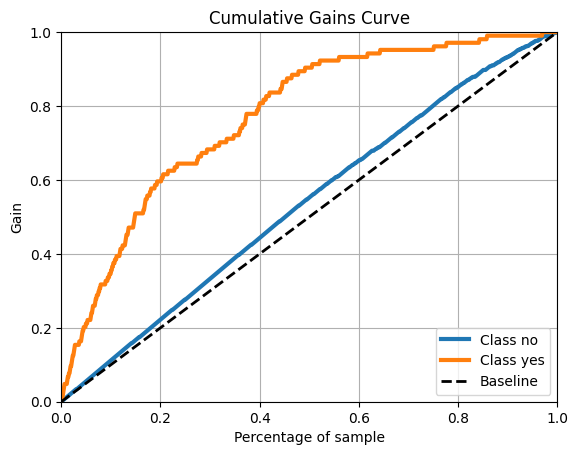

In [99]:
#Naive Bayes

# Probabilités pour chaque prédiction
target_prob_nb = nb_classifier.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test, target_prob_nb)
plt.show()


# Analyse

La courbe de Gain cumulatif montre comment le modèle réussit à identifier les exemples positifs par rapport au nombre total d'exemples positifs dans le jeu de données.

Plus la courbe est proche du coin supérieur droit du graphique, meilleure est la performance du modèle. Une courbe de gain cumulatif qui suit la diagonale (ligne de référence) indique une performance aléatoire, tandis qu'une courbe qui s'en éloigne indique une performance prédictive.

Ici on constate encore une fois que la courbe de gain cumulatif pour la Forêt aléatoire est celle qui présente le meilleur scénario. C'est celle qui classe le mieux les exemples positifs par rapport à la taille de l'ensemble de données. La courbe de gain cumulatif monte vers le coin supérieur droit, cela indique que c'est un modèle performant qui identifie efficacement les exemples positifs.

# Courbe d'apprentissage

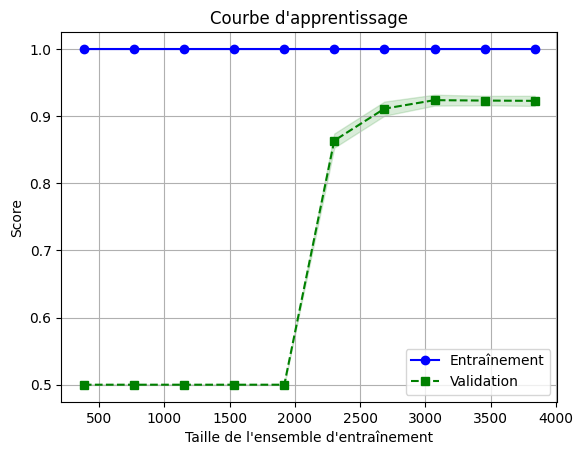

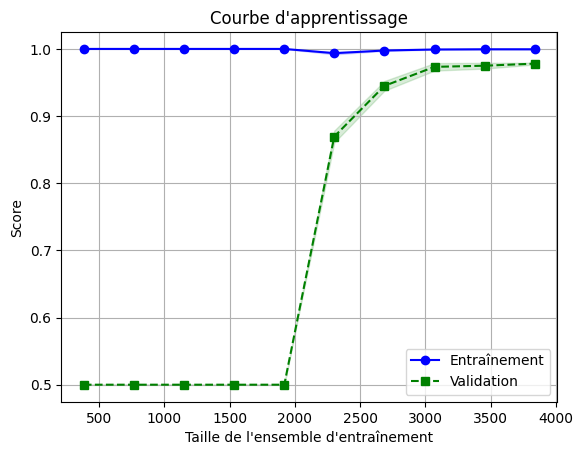

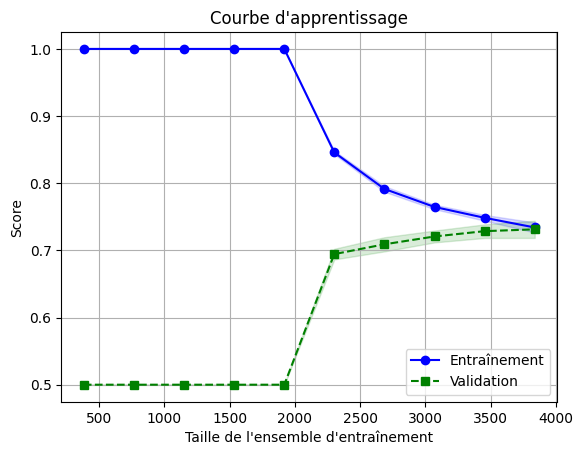

In [120]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Définir une fonction pour tracer la courbe d'apprentissage
def plot_learning_curve(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes, train_mean, color='blue', marker='o', label='Entraînement')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, color='green', marker='s', linestyle='--', label='Validation')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

    plt.title('Courbe d\'apprentissage')
    plt.xlabel('Taille de l\'ensemble d\'entraînement')
    plt.ylabel('Score')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# Tracer la courbe d'apprentissage pour KNN
plot_learning_curve(knn_cv.best_estimator_, X_train_up, y_train_up)

# Tracer la courbe d'apprentissage pour Forêt aléatoire
plot_learning_curve(RF_cv.best_estimator_, X_train_up, y_train_up)

# Tracer la courbe d'apprentissage pour Naive Bayes
plot_learning_curve(nb_cv.best_estimator_, X_train_up, y_train_up)


# Analyse

La courbe d'apprentissage montre la performance du modèle sur les données d'entraînement  et sur les données de validation en fonction du nombre d'exemples d'entraînement.

En observant ces courbes, nous pouvons déterminer si le modèle souffre de surapprentissage (overfitting), de sous-apprentissage (underfitting) ou s'il est bien généralisé.

On constate que les courbes d'apprentissage convergent vers une valeur élevée et se stabilisent, cela indique que les modèles bénéficient de plus de données et qu'ils sont bien généralisé.

La courbe d'apprentissage convergeant le mieux et le plus possible est celle de la Forêt Aléatoire. C'est ce modele qui est donc le plus optimale par analyse d'apprentissage.

# **Recherche des parametres optimaux**

In [119]:
#KNN

#Initializing a grid with possible number of neighbors from 1 to 24

grid = {'n_neighbors' : np.arange(3, 25)}

#Initializing a k-NN classifier

knn_classifier = KNeighborsClassifier()

#Using cross validation to find optimal number of neighbors

knn = GridSearchCV(knn_classifier, grid, cv = 10)

knn.fit(X_train_up, y_train_up)



#Extracting the optimal number of neighbors

print(knn.best_params_)





{'n_neighbors': 3}


In [404]:
# Forêt Aléatoire

# Initialisation d'un classificateur Forêt Aléatoire avec les paramètres par défaut
rf_classifier = RandomForestClassifier(random_state=seed)

# Création d'une grille de différents hyperparamètres
grid_params = {
    'n_estimators': [300, 400, 500],
    'max_depth': [1, 2, 3],
    'min_samples_leaf': [0.05, 0.1, 0.2]
}

# Construction d'un objet GridSearchCV avec validation croisée à 3 plis
grid_object = GridSearchCV(estimator=rf_classifier, param_grid=grid_params, scoring='accuracy',
                           cv=3, n_jobs=-1)

# Ajustement de la grille aux données d'entraînement
grid_object.fit(X_train_up, y_train_up)

# Extraction des meilleurs paramètres
print(grid_object.best_params_)


{'max_depth': 3, 'min_samples_leaf': 0.05, 'n_estimators': 300}


# Analyse

Les résultats de l'optimisation des hyperparamètres indiquent que pour le modèle KNN, le nombre optimal de voisins est de 3, tandis que pour la Forêt Aléatoire, les paramètres optimaux sont une profondeur maximale de 3, un nombre minimal d'échantillons par feuille de 0.05 et 300 arbres de décision à construire.



# **Scaling**

In [118]:
#KNN

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#Setting up the scaling pipeline

pipeline_order = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors = 3))]

pipeline = Pipeline(pipeline_order)

#Fitting the classfier to the scaled dataset

knn_classifier_scaled = pipeline.fit(X_train_up, y_train_up)

#Extracting the score

score = knn_classifier_scaled.score(X_test, y_test)

print("Score du modèle KNN avec mise à l'échelle :", score)

Score du modèle KNN avec mise à l'échelle : 0.8232044198895028


In [117]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Définir l'ordre des étapes du pipeline
pipeline_order = [('scaler', StandardScaler()), ('rf', RandomForestClassifier(random_state=seed))]

# Créer le pipeline
pipeline = Pipeline(pipeline_order)

# Adapter le classificateur au jeu de données mis à l'échelle
rf_classifier_scaled = pipeline.fit(X_train_up, y_train_up)

# Extraire le score du modèle sur l'ensemble de test
score = rf_classifier_scaled.score(X_test, y_test)
print("Score du modèle de forêt aléatoire avec mise à l'échelle :", score)


Score du modèle de forêt aléatoire avec mise à l'échelle : 0.8972375690607735


In [116]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB

# Création d'un pipeline avec le scaler et le modèle GaussianNB
pipeline_order_nb = [('scaler', StandardScaler()), ('gnb', GaussianNB())]
pipeline_nb = Pipeline(pipeline_order_nb)

# Entraînement du modèle avec les données d'entraînement après le scaling
pipeline_nb.fit(X_train_up, y_train_up)

# Evaluation du modèle sur les données de test
score_nb = pipeline_nb.score(X_test, y_test)
print("Score du modèle GaussianNB avec mise à l'échelle :", score_nb)


Score du modèle GaussianNB avec mise à l'échelle : 0.8497237569060774


# Analyse

Lorsque l'on compare les performances de nos modèles avec et sans mise à l'échelle des données, voici ce que nous pouvons déduire :

    KNN (K plus proches voisins) :
        Sans mise à l'échelle : Score de 0.92
        Avec mise à l'échelle : Score de 0.82
  
  Analyse : La performance du modèle KNN diminue légèrement avec la mise à l'échelle des données. Cela peut être dû à la nature de l'algorithme KNN, qui calcule les distances entre les points. La mise à l'échelle peut avoir un impact sur la distance calculée entre les points, ce qui affecte la performance du modèle.

    Forêt Aléatoire :
        Sans mise à l'échelle : Score de 0.98
        Avec mise à l'échelle : Score de 0.89
Analyse : La performance du modèle de Forêt Aléatoire diminue également avec la mise à l'échelle des données, bien que dans une moindre mesure que le modèle KNN. Cela peut indiquer que les données n'ont pas nécessairement besoin d'être mises à l'échelle pour que le modèle de Forêt Aléatoire fonctionne efficacement, ou que d'autres facteurs influencent davantage sa performance que la mise à l'échelle.

    Naive Bayes :
        Sans mise à l'échelle : Score de 0.73
        Avec mise à l'échelle : Score de 0.84
Analyse : Contrairement aux modèles KNN et Forêt Aléatoire, le modèle Naive Bayes semble bénéficier de la mise à l'échelle des données, avec une amélioration significative de sa performance. Cela peut être dû à la sensibilité du modèle Naive Bayes aux distributions des caractéristiques, et la mise à l'échelle des données peut aider à normaliser ces distributions, améliorant ainsi la performance du modèle.



# **Conclusion**





Apres avoir procédé au pré-traitement des données :


> -suppression des colonnes vides et colonnes avec valeurs manquantes

> -encodage



> -division en ensembles (entraînement, validation, test)

> -sur-échantillonage(équilibre de classe)




Nous avons suivi ces étapes pour déterminer un modele optimale :

> **Évaluation des modèles :** Nous avons évalué plusieurs modèles en utilisant la validation croisée pour comparer leurs performances. Cela nous a permis de voir comment chaque modèle se comporte sur notre jeu de données et de sélectionner les modèles qui donnent les meilleurs résultats en termes de métriques d'évaluation telles que l'exactitude, la précision et le rappel.
En considérant ces facteurs, la forêt aléatoire semble être le meilleur modèle, car elle a la plus haute précision globale et des performances relativement bonnes en termes de précision et de rappel pour les deux classes. Cependant, il est important de considérer d'autres aspects, le choix dépendra des besoins spécifiques du problème et des compromis entre la précision et le rappel que nous sommes prêts à faire. La courbe ROC nous montre que la Forêt Aléatoire est le modele produisant le moins d'erreur.La courbe de Gain cumulatif nous montre que le modèle le plus performant,  identifiant efficacement les exemples positifs, est la Forêt Aléatoire. La courbe d'apprentissage convergeant le mieux et le plus possible est celle de la Forêt Aléatoire, c'est ce modele qui est le mieux généralisé.

> **Détermination des paramètres optimaux:** Après avoir évalué les modèles, nous avons utilisé la recherche par grille (GridSearchCV) pour déterminer les meilleurs hyperparamètres pour chaque modèle. Cela nous permet d'optimiser les performances de chaque modèle en réglant les paramètres qui les contrôlent.
Pour la Forêt Aléatoire, les paramètres optimaux sont une profondeur maximale de 3, un nombre minimal d'échantillons par feuille de 0.05 et 300 arbres de décision à construire.

> **Scaling (Mise à l'échelle) :** La mise à l'échelle des données est une étape de prétraitement supplémentaire qui peut être bénéfique pour certains modèles.
La comparaison des performances des modèles montre que l'effet de la mise à l'échelle des données varie selon l'algorithme : tandis que KNN et la Forêt Aléatoire semblent moins performants avec la mise à l'échelle, le modèle Naive Bayes bénéficie d'une amélioration significative de sa performance.


> **Décision finale :** Au terme de nos analyses approfondies, la Forêt Aléatoire émerge comme le choix optimal, démontrant une précision globale supérieure, des bonnes performances  en termes de précision et de rappel pour les deux classes, ainsi qu'une plus grande stabilité et généralisation confirmées par les courbes ROC, de gain cumulatif et d'apprentissage.


